<img src="https://i.imgur.com/6U6q5jQ.png"/>







# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [5]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [6]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [7]:
# You see edges items
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

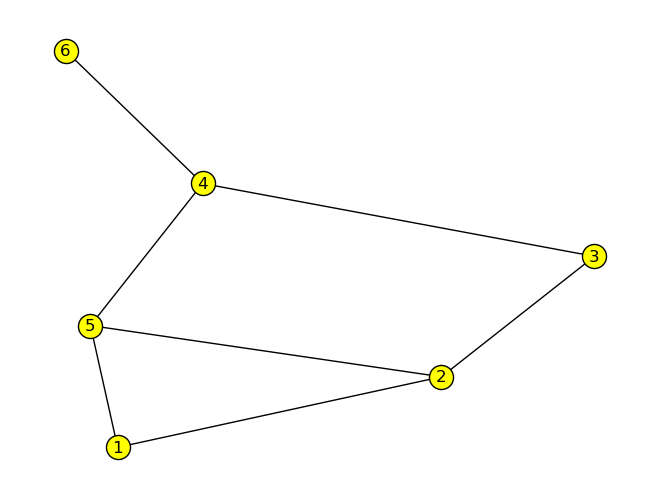

In [8]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

Notice that the position of the nodes will vary every time you re draw the graph. In fact, drawing a graph can become a challenge by itself when we need to find information via visualization. 


## Interaction with Pyvis

Pyvis uses color, size, label and title attributes.

In [9]:
# dict of labels
labels={i:str(i) for i in G.nodes()}
labels # string as label

{1: '1', 2: '2', 5: '5', 3: '3', 4: '4', 6: '6'}

In [10]:
nx.set_node_attributes(G,labels,'label') # values according to id
nx.set_node_attributes(G,'red','color') # for all
G.nodes.data()

NodeDataView({1: {'label': '1', 'color': 'red'}, 2: {'label': '2', 'color': 'red'}, 5: {'label': '5', 'color': 'red'}, 3: {'label': '3', 'color': 'red'}, 4: {'label': '4', 'color': 'red'}, 6: {'label': '6', 'color': 'red'}})

In [11]:
from pyvis.network import Network

Gvis = Network('500px', '500px',notebook=True,cdn_resources='remote')
Gvis.from_nx(G.copy()) # create a copy!
Gvis.show('Gvis.html')

Gvis.html




### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

In [ ]:
# create graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [ ]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [ ]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

Set the color of the node based on sex:

In [ ]:
#if 
nx.get_node_attributes(dG, "sex").items()

In [ ]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

In [ ]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

In [ ]:
# since
nx.get_node_attributes(dG, "color").values()

Attributes can serve for some computational purposes, but also help to visually find structures.

In [ ]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [ ]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [ ]:
# see them
dG.edges.data()

Let me add another attribute conditional on another attribute:

In [ ]:
# if
{i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

In [ ]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [ ]:
# see edges and attributes
dG.edges.data()

Let's use edge attributes:

In [ ]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [ ]:
nx.get_edge_attributes(dG,'color').values()

In [ ]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
colors_for_nodes=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.spring_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=colors_for_nodes)
# draw edges
nx.draw_networkx_edges(dG, pos,
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,
                               edge_labels=weight_values)

The interactive version needs labels, we don't have them yet:

In [ ]:
dG.nodes.data()[1].keys()

In [ ]:
[i[2].keys() for i in dG.edges.data()][0]

In [ ]:
# id as label
labels={i:str(i) for i in dG.nodes()}
nx.set_node_attributes(dG, labels, "label")

# weight as label
labels={e:str(v) for e,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG, labels, "label")

In [ ]:
dGvis = Network('500px', '500px',notebook=True,cdn_resources='remote',directed=True)
dGvis.from_nx(dG.copy())
dGvis.show('dGvis.html')

### Exporting

Network does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [ ]:
nx.write_graphml(dG, "dG.graphml",encoding='utf-8')

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="graphdata/paper.png" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="graphdata/dataRed.png" width="900">

This is an spreadsheet, representing the information above:

<img src="graphdata/dataExcel.png" width="900">

Let's use the data from the spreadsheet to prepare our table:

In [ ]:
# reading in
import pandas as pd
import os

FigueData = pd.read_excel(os.path.join("graphdata","dataFigueroa.xlsx"),
                          index_col=0) #notice!!!!!

We got this:

In [ ]:
FigueData.head()

As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [ ]:
FigueData.columns

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [ ]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

It is easy to turn the adjacency matrix into a graph:

In [ ]:
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [ ]:
# nodes:
len(EliteNet)

In [ ]:
# edges:
EliteNet.size()

In [ ]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [ ]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

In [ ]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [ ]:
FigueData['Multinacional'].head()

Currently:

In [ ]:
# no attribute:
EliteNet.nodes.data()

Let me prepare a dictionary:

In [ ]:
dict(zip(FigueData.index,FigueData['Multinacional']))

Then, I can use that to add an attribute to the node:

In [ ]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [ ]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")

# updated nodes
EliteNet.nodes.data()

In [ ]:
# using node attributes

nx.draw_random(EliteNet)

### Exercise 1 
<div class="alert-success">

1. Plot a colored version of the nodes based on attributes of the previous plot.
2. Plot using Pyvis.
3. Export the network: **nx.write_graphml(EliteNet, os.path.join("graphdata","EliteNet.graphml"),encoding='utf-8')**
4. Open the exported network in R and Gephi. Plot the graphs.    
</div>

# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [ ]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have previously pre processed the data. Let me open the file with _inforce_ agreements:

In [ ]:
tradeDF=pd.read_pickle(os.path.join("graphdata","tradeData_forGraph.pkl"))
tradeDF.info()

The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [ ]:
tradeDF.head()

Let me check the type of agreements we have in the data.

In [ ]:
tradeDF.Type.value_counts()

Let me choose the 'Framework Agreement':

In [ ]:
tradeDF.loc[tradeDF.Type=='Framework Agreement',:]

I can make a network of countries. Let me create "edges" using **Membership_list**. First, let me show you how **combinations** work:

In [ ]:
from itertools import combinations

[x for x in combinations(['chile','ecuador','peru'],2)]

In [ ]:
[x for x in combinations(['peru','ecuador','chile'],2)]

In [ ]:
[x for x in combinations(sorted(['peru','ecuador','chile']),2)]

In [ ]:
# all the pairs
list(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

All the pairs above represent nodes and edges, then:

In [ ]:
import networkx as nx

Framework_Agreement_Net = nx.Graph(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

In [ ]:
# see edges
Framework_Agreement_Net.edges()

In [ ]:
#draw the graph
nx.draw(Framework_Agreement_Net, with_labels=True)

Let me explore the other types:

In [ ]:
tradeDF.loc[tradeDF.Type=='Customs Union Accession Agreement',:]

In [ ]:
Accession_Agreement_Net_1973 = nx.Graph(combinations(sorted(tradeDF.loc[72,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_1973, with_labels=True)

In [ ]:
Accession_Agreement_Net_2007 = nx.Graph(combinations(sorted(tradeDF.loc[71,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_2007, with_labels=True)

Let´s see this other type, but only after the year 2000:

In [ ]:
tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]

Let´s keep the countries per row:

In [ ]:
RFTA_countryLists=tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]['Membership_list']
RFTA_countryLists

In [ ]:
listOfTuples=[]
for listOfMembers in RFTA_countryLists:
    for country1, country2 in combinations(sorted(listOfMembers),2):
        listOfTuples.append((country1, country2))

# see 
listOfTuples

Let's count each time a tuple happens:

In [ ]:
pd.Series(listOfTuples).value_counts().reset_index()

We can prepare a dataframe:

In [ ]:
newNames={'index':'countryTuple',	'count':'weight'}
tuplesAndWeights=pd.DataFrame(pd.Series(listOfTuples).value_counts()).reset_index(drop=False).rename(columns=newNames)
tuplesAndWeights

Let's create separate columns:

In [ ]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

In [ ]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [ ]:
RFTA_net.edges.data()

In [ ]:
nx.draw(RFTA_net)

In [ ]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

We are not supposed to have isolates:

In [ ]:
list(nx.isolates(RFTA_net))

There should not be self loops:

In [ ]:
nx.number_of_selfloops(RFTA_net)

In [ ]:
# which are they?
nx.number_connected_components(RFTA_net)

We may remove those edges:

In [ ]:
G_all.remove_edges_from(nx.selfloop_edges(G_all))

In [ ]:
# G_allvis = Network('800px', '800px',notebook=True,cdn_resources='remote',directed=False)
# G_allvis.from_nx(G_all.copy())
# G_allvis.show('G_allvis.html')

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong> 
* Create a network creating all the edges from the whole dataset.
* Plot the network in R, Gephi and Python. Is there any issue?    
</div>